# Predicting Employee Attrition With Machine Learning in R

## Prepared by

Author: Shinin Varongchayakul

Date: 07 Apr 2025

Language: R

## Dataset

Name: IBM HR Analytics Employee Attrition & Performance

Source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Business Problem
- A company was experiencing employee attrition, losing key talents, productivity, and employee engagement.
- The company wanted to understand factors related to attrition and how to predict attrition so that they may take steps to prevent their talents from leaving.

## Objectives of the Present Analysis
Given the business problem, the goals of the present analysis are twofolds:
1. Explore the pattern of attrition in related to employee and job characteristics.
2. Build a machine learning model to predict employee attrition.

## Analysis Steps
1. Install and load necessary packages
2. Prepare the dataset
3. Exploratory data analysis (EDA)
4. Building a predictive model
5. Summary and recommendations

## 1. Install & Load Necessary Packages

In [84]:
# Install packages
install.packages("tidyverse") # data manipulation
install.packages("effsize") # effect size calculation
install.packages("ggcorrplot") # correlation matrix
install.packages("tidymodels") # machine learning
install.packages("themis") # upsampling technique
install.packages("vip") # feature importance in ML models
install.packages("pdp") # plotting partial dependencies

Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'effsize' is in use and will not be installed"
Warning message:
"package 'ggcorrplot' is in use and will not be installed"
Warning message:
"package 'tidymodels' is in use and will not be installed"
Warning message:
"package 'themis' is in use and will not be installed"
Warning message:
"package 'vip' is in use and will not be installed"
Warning message:
"package 'pdp' is in use and will not be installed"


In [85]:
# Load packages
library(tidyverse)
library(effsize)
library(ggcorrplot)
library(tidymodels)
library(themis)
library(vip)
library(pdp)

## 2. Prepare the Dataset

### 2.1 Load & Preview

In [86]:
# Load the dataset
hr <- read.csv("https://raw.githubusercontent.com/svarong-port/data-analytics-projects/refs/heads/main/ibm_hr_employee_attrition/hr_employee_attrition_dataset.csv")

In [87]:
# Preview the first 6 rows
head(hr)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


In [88]:
# View the structure
glimpse(hr)

Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <chr> "Yes", "No", "Yes", "No", "No", "No", "No", "…
$ BusinessTravel           <chr> "Travel_Rarely", "Travel_Frequently", "Travel…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <chr> "Sales", "Research & Development", "Research …
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <int> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <chr> "Life Sciences", "Life Sciences", "Other", "L…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <chr> "Female", "Male", "Male", "Female", "Male", "…
$ HourlyRate    

### 2.2 Explore & Clean the Data

In [89]:
# Convert categorical variables to factor

## Define categorical variables
cat_vars <- c("Attrition", "BusinessTravel", "Department",
              "Education", "EducationField", "Gender",
              "JobLevel", "JobRole", "MaritalStatus",
              "Over18", "OverTime", "StockOptionLevel")

## Convert to factor
hr_cleaned <- hr |>
  
  ### Mutate across
  mutate(across(all_of(cat_vars), as.factor))

## Set attrition factor levels
hr_cleaned$Attrition <- factor(hr_cleaned$Attrition,
                               levels = c("Yes", "No"))

## Check the results
glimpse(hr_cleaned)


Rows: 1,470
Columns: 35
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <fct> Yes, No, Yes, No, No, No, No, No, No, No, No,…
$ BusinessTravel           <fct> Travel_Rarely, Travel_Frequently, Travel_Rare…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <fct> Sales, Research & Development, Research & Dev…
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <fct> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <fct> Life Sciences, Life Sciences, Other, Life Sci…
$ EmployeeCount            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ EmployeeNumber           <int> 1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <fct> Female, Male, Male, Female, Male, Male, Femal…
$ HourlyRate    

Comment: The categorical columns are successfully converted to `factor`.

In [90]:
### Remove non-predictive variables
hr_cleaned <- hr_cleaned |>
  
  #### Deselect
  select(-EmployeeCount,
         -EmployeeNumber,
         -Over18)

### Check the results
glimpse(hr_cleaned)

Rows: 1,470
Columns: 32
$ Age                      <int> 41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2…
$ Attrition                <fct> Yes, No, Yes, No, No, No, No, No, No, No, No,…
$ BusinessTravel           <fct> Travel_Rarely, Travel_Frequently, Travel_Rare…
$ DailyRate                <int> 1102, 279, 1373, 1392, 591, 1005, 1324, 1358,…
$ Department               <fct> Sales, Research & Development, Research & Dev…
$ DistanceFromHome         <int> 1, 8, 2, 3, 2, 2, 3, 24, 23, 27, 16, 15, 26, …
$ Education                <fct> 2, 1, 2, 4, 1, 2, 3, 1, 3, 3, 3, 2, 1, 2, 3, …
$ EducationField           <fct> Life Sciences, Life Sciences, Other, Life Sci…
$ EnvironmentSatisfaction  <int> 2, 3, 4, 4, 1, 4, 3, 4, 4, 3, 1, 4, 1, 2, 3, …
$ Gender                   <fct> Female, Male, Male, Female, Male, Male, Femal…
$ HourlyRate               <int> 94, 61, 92, 56, 40, 79, 81, 67, 44, 94, 84, 4…
$ JobInvolvement           <int> 3, 2, 2, 3, 3, 3, 4, 3, 2, 3, 4, 2, 3, 3, 2, …
$ JobLevel      

Comment: `EmployeeCount`, `EmployeeNumber`, and `Over18` are successfully removed.

In [91]:
# Handle missing values

## Check for missing values
anyNA(hr_cleaned)

[1] FALSE

Comment: There are no missing values in this dataset.

In [ ]:
# Summarise the attrition rate
hr_cleaned |>
  
  ## Group and count by attrition
  count(Attrition,
        name = "Count") |>
  
  ## Compute percentage
  mutate(Percent = round(Count / sum(Count) * 100, 2))

Attrition,Count,Percent
<fct>,<int>,<dbl>
Yes,237,16.12
No,1233,83.88


Comment: The outcome has class imbalance where the positive class makes up around 1/4 of the observations.

# 3. Exploratory Data Analysis (EDA)

### 3.1 Part I – Overview

Warning message in cor(select(mutate(hr_cleaned, AttritionEncoded = if_else(Attrition == :
"the standard deviation is zero"


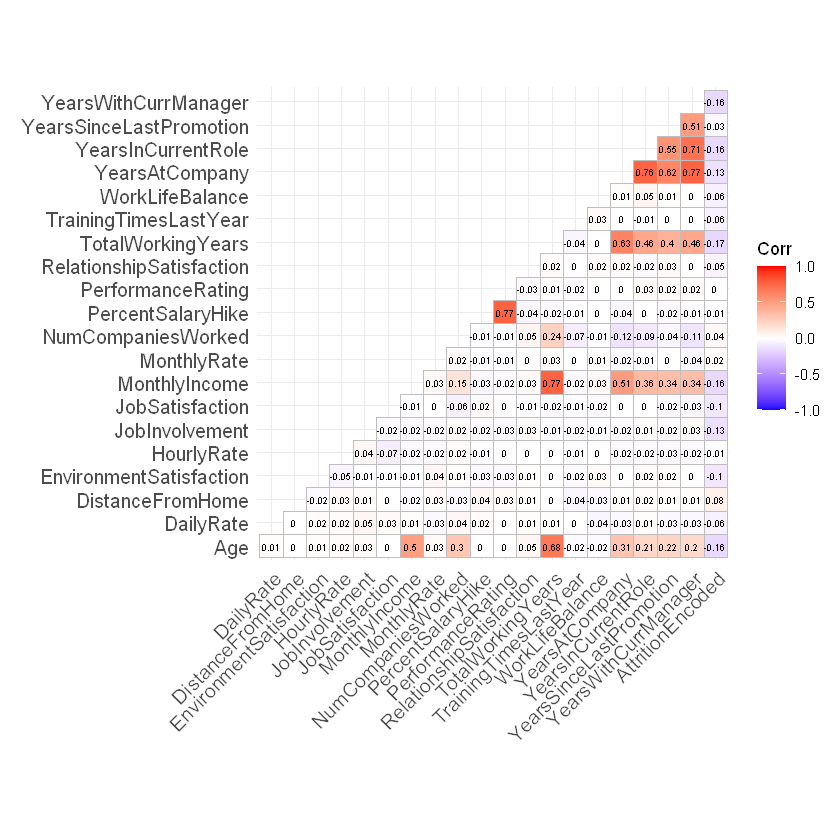

In [93]:
# Get an overview of the relationships in the data
hr_cleaned |>
  
  ## Encode attrition to numeric
  mutate(AttritionEncoded = if_else(Attrition == "Yes", 1, 0)) |>
  
  ## Select only numeric variables
  select(where(is.numeric)) |>
  
  ## Create a correlation matrix
  cor(use = "complete.obs") |>
  
  ## Visualise the correlation matrix
  ggcorrplot(lab = TRUE,
             type = "lower",
             colors = c("blue", "white", "red"),
             lab_size = 2.0)

Comments:
- All correlations between attrition and other variables are low (min = 0; max = -0.17).
- This suggests that attrition may be a result of a combination of several factors rather than any single factor alone.

### 3.2 Part II - The Three Likely Predictors

Explore 3 factors that are likely to contribute to attrition:
1. **Monlthy income:** Employees may leave due to insufficient financial incentive, where lower income associated with higher attrition rate.
2. **Overtime:** Employees may leave because of workload, where those with more overtime more likely to leave.
3. **Environment satisfaction:** Those unsatisfied with their workplace conditions may be more likely to leave.

#### 3.2.1 Factor 1 – Monthly Income

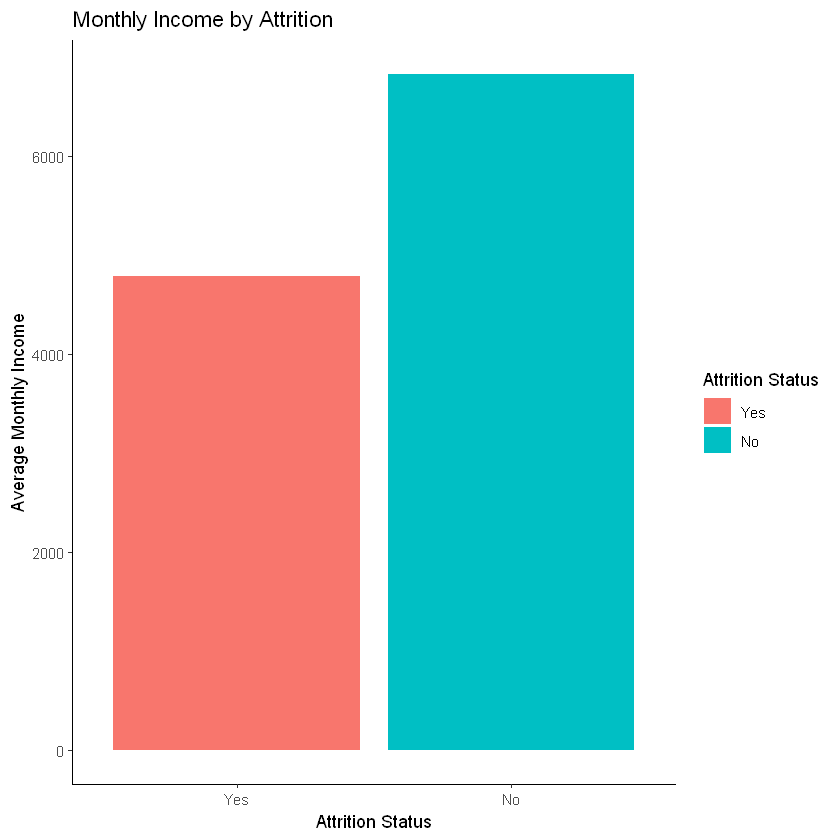

In [94]:
# 1. Monlthy income vs attrition
hr_cleaned |>
  
  ## Group by attrition
  group_by(Attrition) |>
  
  ## Summarise
  summarise(AVGMonthlyIncome = mean(MonthlyIncome)) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Attrition,
             y = AVGMonthlyIncome,
             fill = Attrition)) +
  
  ## Call bar plot
  geom_col() +
  
  ## Add text elements
  labs(title = "Monthly Income by Attrition",
       x = "Attrition Status",
       y = "Average Monthly Income",
       fill = "Attrition Status") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Change theme to classic for easy viewing
  theme_classic()

Comments:
- On average, those who stayed appear to earn more than those who left.
- This suggests that monthly income is a contributing factor to attrition.

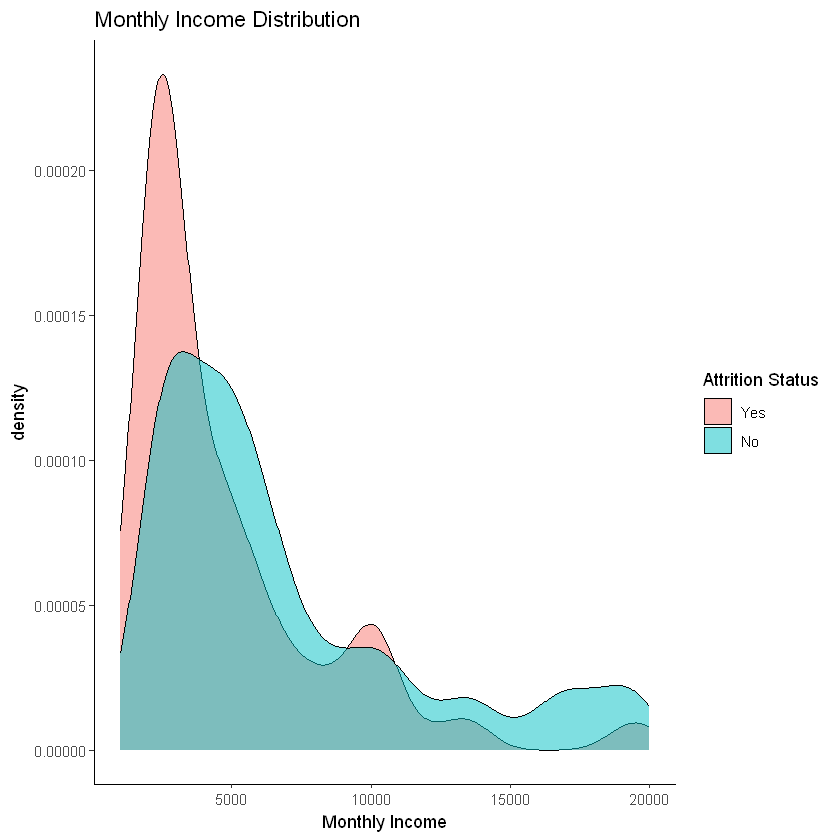

In [95]:
# Check the distribution of monthly income
hr_cleaned |>
  
  ## Aesthetic mapping
  ggplot(aes(x = MonthlyIncome,
             fill = Attrition)) +
  
  ## Call density plot
  geom_density(alpha = 0.5) +
  
  ## Add text elements
  labs(title = "Monthly Income Distribution",
       x = "Monthly Income",
       fill = "Attrition Status") +
  
  ## Change theme to classic for easy viewing
  theme_classic()

Comments:
- The distributions of both attrition groups are positively skewed.
- There are more proportionally more people who left in the lower end of the monthly income distribution.
- This adds further support to the earlier analysis that monthly income is a contributor of attrition.

#### 3.2.2 Factor 2 – Overtime

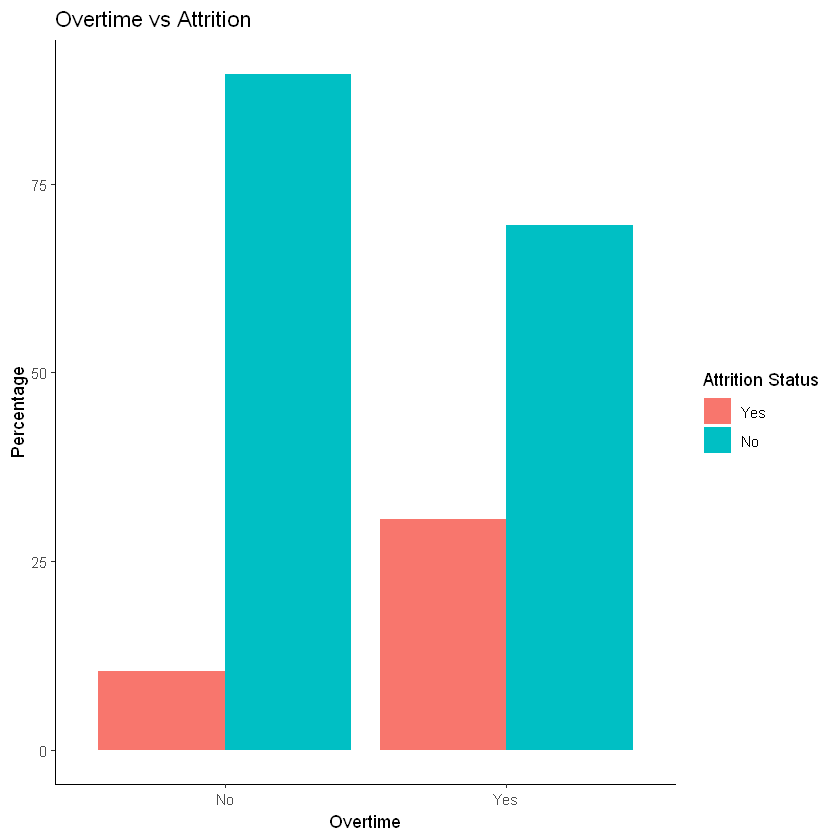

In [96]:
# 2. Overtime vs attrition
hr_cleaned |>
  
  ## Group by overtime and attrition
  group_by(OverTime, Attrition) |>
  
  ## Count the observations in each group
  summarise(Count = n(), .groups = "drop") |>
  
  ## Group by overtime
  group_by(OverTime) |>
  
  ## Compute percentage
  mutate(Percent = Count / sum(Count) * 100) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = OverTime,
             y = Percent,
             fill = Attrition)) +
  
  ## Call count plot
  geom_col(position = "dodge") +
  
  ## Add text elements
  labs(title = "Overtime vs Attrition",
       x = "Overtime",
       y = "Percentage",
       fill = "Attrition Status") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Change theme to classic for easy viewing
  theme_classic()

Comments:
- In both overtime conditions, there were more people who stayed than who left.
- The attrition rate was significantly higher in the overtime condition than in the no-overtime condition.
- Conversely, the percentage of those who stayed was higher in no-overtime condition than in the overtime condition.
- This suggests that overtime contributes to attrition.

#### 3.2.3 Factor 3 – Environment Satisfaction

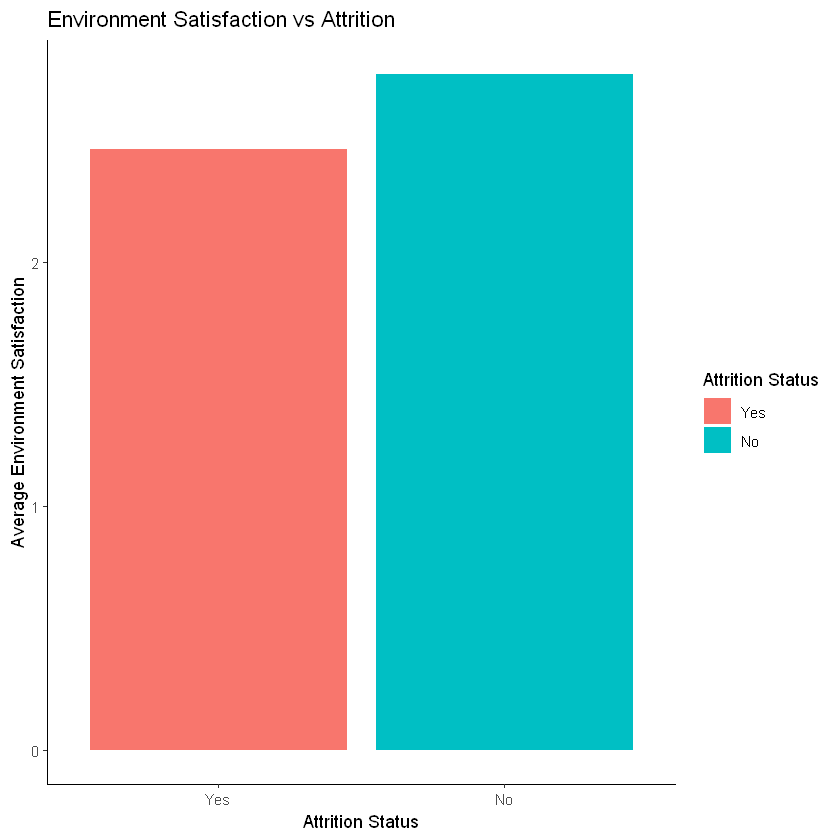

In [97]:
# 3. Environment satisfaction vs attrition
hr_cleaned |>
  
  ## Group by attrition
  group_by(Attrition) |>
  
  ## Compute mean environment satisfaction
  summarise(AVGEnvSat = mean(EnvironmentSatisfaction)) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Attrition,
             y = AVGEnvSat,
             fill = Attrition)) +
  
  ## Call bar plot
  geom_col() +
  
  ## Add text elements
  labs(title = "Environment Satisfaction vs Attrition",
       x = "Attrition Status",
       y = "Average Environment Satisfaction",
       fill = "Attrition Status") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Change theme to classic for easy viewing
  theme_classic()

Comment: It is not clear whether there is a significant difference between the attrition groups.

In [98]:
# Conduct an independent t-test to test the difference
t.test(EnvironmentSatisfaction ~ Attrition, data = hr_cleaned)


	Welch Two Sample t-test

data:  EnvironmentSatisfaction by Attrition
t = -3.7513, df = 316.62, p-value = 0.0002092
alternative hypothesis: true difference in means between group Yes and group No is not equal to 0
95 percent confidence interval:
 -0.468253 -0.146056
sample estimates:
mean in group Yes  mean in group No 
         2.464135          2.771290 


In [99]:
# Check the effect size
cohen.d(EnvironmentSatisfaction ~ Attrition, data = hr_cleaned)


Cohen's d

d estimate: -0.2824158 (small)
95 percent confidence interval:
     lower      upper 
-0.4219167 -0.1429148 


Comments:
- While there is a statistically significant difference in environment satisfaction between the attrition groups (t = -3.75, p < .001), its magnitude is small.
- This suggests that while environment satisfaction may play a role in attrition, its influence may not be as importance as other factors such as monthly income and overtime.

### 3.3 Part III – Attrition by Department & Job Role

#### 3.3.1 Attrition by Department

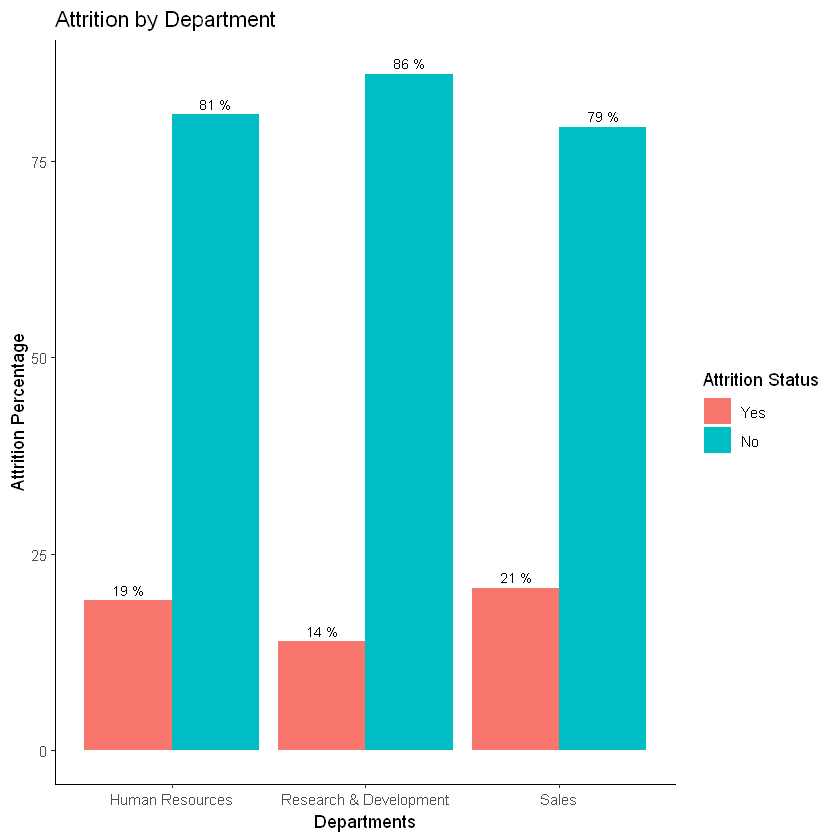

In [100]:
# Attrition by department
hr_cleaned |>
  
  ## Group by department and attrition
  group_by(Department, Attrition) |>
  
  ## Count the number of observations
  summarise(Count = n(), .groups = "drop") |>
  
  ## Group by department
  group_by(Department) |>
  
  ## Compute percentage
  mutate(Percent = Count / sum(Count) * 100) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Department,
             y = Percent,
             fill = Attrition)) +
  
  ## Call on bar plot
  geom_col(position = "dodge") +
  
  ## Add percent text
  geom_text(aes(label = paste(round(Percent, 0), "%")),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3) +
  
  ## Add text elements
  labs(title = "Attrition by Department",
       x = "Departments",
       y = "Attrition Percentage",
       fill = "Attrition Status") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Adjust theme to classic for easy viewing
  theme_classic()

Comments:
- All departments have a similar percentage of people leaving and staying.
- Notably, however, R&D has a lower percent of people leaving and a slightly higher percentage of people staying compared to the other departments.
- Additionally, Sales has the highest percentage of people leaving and lowest percetage of people staying. This suggests that the attrition may have the most impact in Sales.

#### 3.3.2 Attrition by Job Role

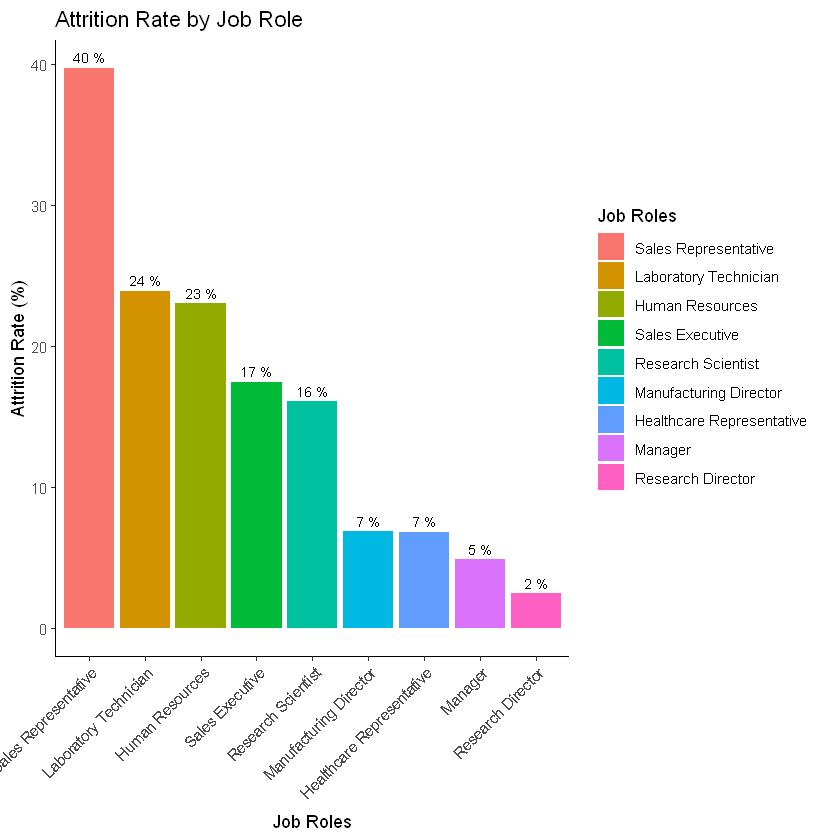

In [101]:
# Attrition by job role
hr_cleaned |>
  
  ## Group by department and attrition
  group_by(JobRole) |>
  
  ## Count the number of observations
  summarise(AttritionRate = mean(Attrition == "Yes") * 100) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Reorder job role levels
  mutate(JobRole = fct_reorder(JobRole,
                               AttritionRate,
                               .desc = TRUE)) |>
  
  ## Aesthetic mapping
  ggplot(aes(x = JobRole,
             y = AttritionRate,
             fill = JobRole)) +
  
  ## Call on bar plot
  geom_col() +
  
  ## Add percent text
  geom_text(aes(label = paste(round(AttritionRate, 0), "%")),
            vjust = -0.5,
            size = 3) +
  
  ## Add text elements
  labs(title = "Attrition Rate by Job Role",
       x = "Job Roles",
       y = "Attrition Rate (%)",
       fill = "Job Roles") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Adjust theme to classic for easy viewing
  theme_classic() +
  
  ## Adjust text elements
  theme(axis.text.x = element_text(angle = 45,
                                   hjust = 1))

Comments:
- The Sales Rep role has the highest percentage of attrition.
- The Research Director role has the lowest percentage of attrition.
- Given the job role titles, employees in lower job levels appear to leave more often.

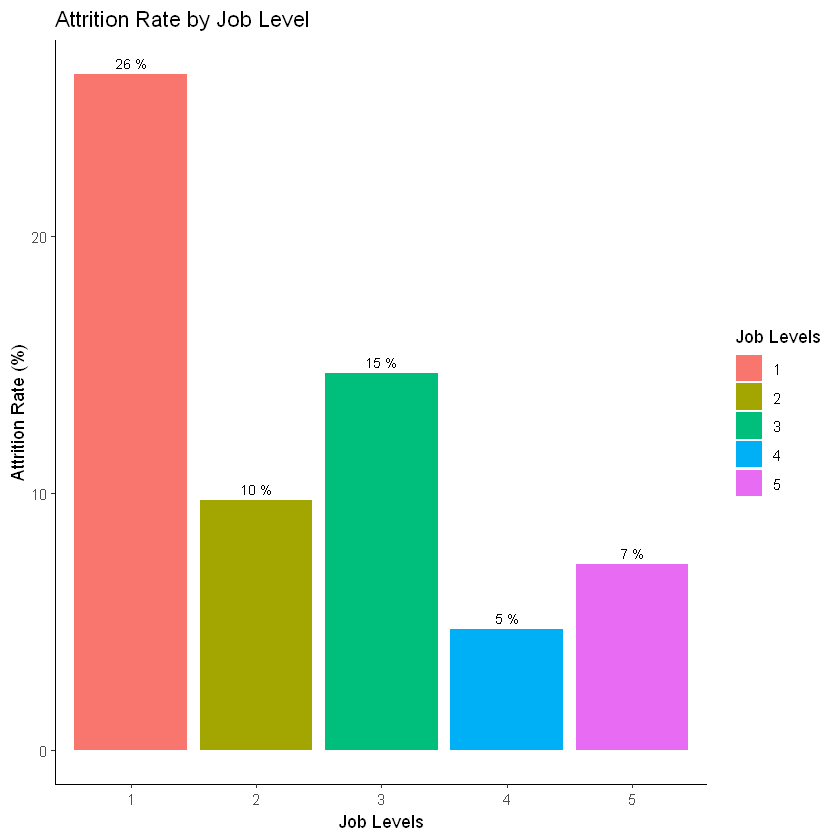

In [102]:
# Confirm whether job level is associated with attrition
hr_cleaned |>
  
  ## Group by job levels
  group_by(JobLevel) |>
  
  ## Compute attrition rate
  summarise(AttritionRate = mean(Attrition == "Yes") * 100) |>
  
  ## Ungroup
  ungroup() |>

  ## Aesthetic mapping
  ggplot(aes(x = JobLevel,
             y = AttritionRate,
             fill = JobLevel)) +
  
  ## Call on bar plot
  geom_col() +
  
  ## Add percent text
  geom_text(aes(label = paste(round(AttritionRate, 0), "%")),
            vjust = -0.5,
            size = 3) +
  
  ## Add text elements
  labs(title = "Attrition Rate by Job Level",
       x = "Job Levels",
       y = "Attrition Rate (%)",
       fill = "Job Levels") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ## Adjust theme to classic for easy viewing
  theme_classic()

Comments:
- Job level 1 has the highest attrition percentage, while job levels 4 and 5 have the lowest attrition percentages.
- This supports the earlier notion that employees in lower job levels are more likely to leave the company.

### 3.4 Part IV – Attrition by Gender & Age

#### 3.4.1 Attrition by Gender

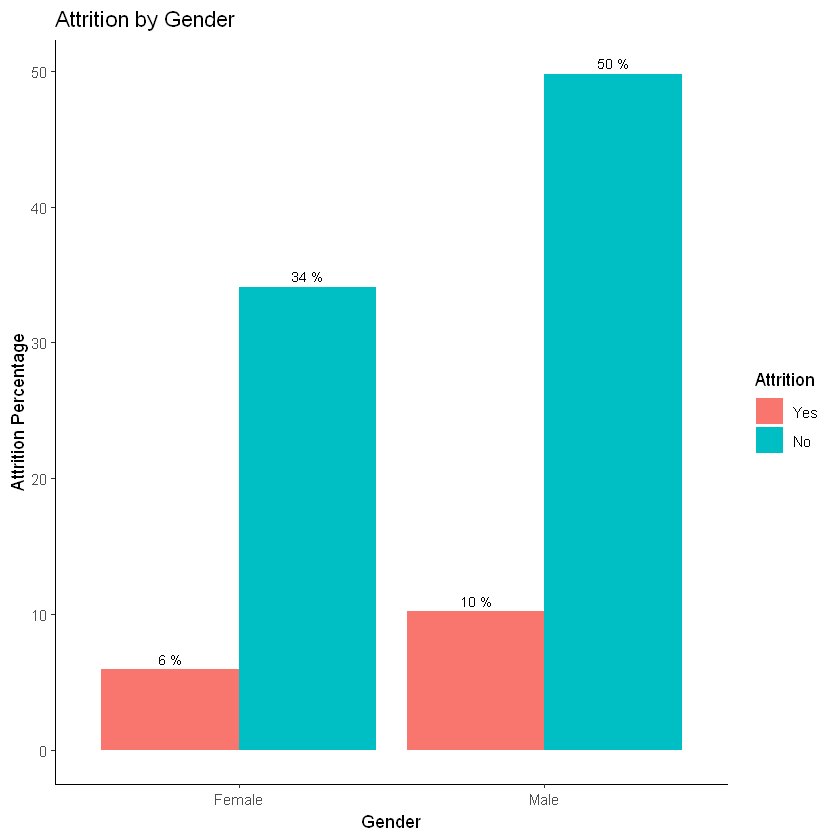

In [103]:
# Gender vs attrition
hr_cleaned |>
  
  ## Group by gender and attritiom
  group_by(Gender, Attrition) |>
  
  ## Count the number of observations
  summarise(Count = n(), .groups = "drop") |>
  
  ## Group by gender
  mutate(Percent = Count / sum(Count) * 100) |>
  
  ## Ungroup
  ungroup() |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Gender,
             y = Percent,
             fill = Attrition)) +
  
  ## Call on bar plot
  geom_col(position = "dodge") +
  
  ## Add percent text
  geom_text(aes(label = paste(round(Percent, 0), "%")),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3) +
  
  ## Add text elements
  labs(title = "Attrition by Gender",
       x = "Gender",
       y = "Attrition Percentage",
       fill = "Attrition") +
  
  ## Adjust x scale
  scale_x_discrete() +
  
  ### Adjust theme to classic for easy viewing
  theme_classic()

Comments:
- In both attrition conditions, there were more males than females.
- Among both genders, more people left than stayed.
- Since the attrition patterns are similar across genders, this variable may contribute weakly to attrition.

#### 3.4.2 Attrition by Age

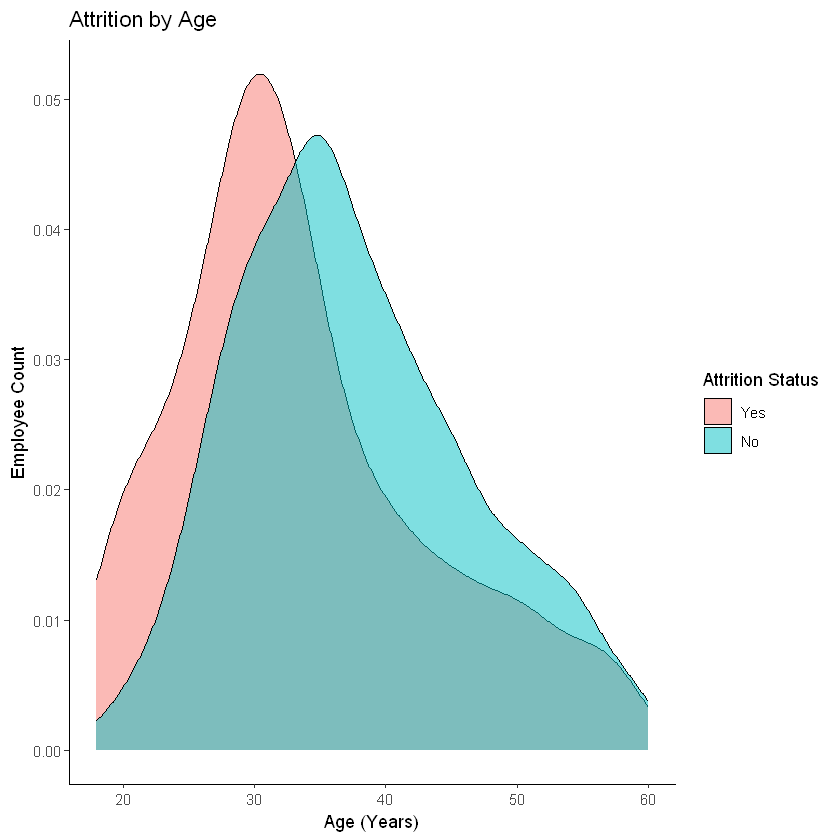

In [104]:
# Age vs attrition

hr_cleaned |>
  
  ## Aesthetic mapping
  ggplot(aes(x = Age,
             fill = Attrition)) +
  
  ## Call on density plot
  geom_density(alpha = 0.5) +
  
  ## Add text elements
  labs(title = "Attrition by Age",
       x = "Age (Years)",
       y = "Employee Count",
       fill = "Attrition Status") +
  
  ## Adjust theme to classic for easy viewing
  theme_classic()

Comments:
- The age distributions are similar across attrition conditions.
- The age distribution for those who stayed is more normally distributed.
- The peaks are close together.
- As the peak for those who left leans more towards the left, it suggests that people who left tend to be younger.
- This suggests that age may be a worthwhile predictor of attrition.

# 4. Building a Predictive Model

Guiding questions for this step:
1. Can we predict attrition?
2. If so, what is the accuracy of the model?
3. What are the top five predictors of attrition?

## 4.1 Split the Data

In [105]:
# Split the data

## Set seed for reproducibility
set.seed(1853)

## Define splitting index
hr_split <- initial_split(hr_cleaned,
                          prop = 0.8,
                          strata = Attrition)

## Create a training set
hr_train <- training(hr_split)

## Create a training set
hr_test <- testing(hr_split)

## 4.2 Build a Model

Here, I choose to build a random forest model because of its unique balance between accuracy and explainability.

### 4.2.1 Tune the Model

In [106]:
# Instantiate a random forest model
rf_model <- rand_forest(mtry = tune(),
                        min_n = tune(),
                        trees = 500) |>
  
  ## Set engine
  set_engine("ranger",
             importance = "permutation") |>
  
  ## Set mode
  set_mode("classification")

In [107]:
# Create a model recipe
rf_rec <- recipe(Attrition ~ .,
                 data = hr_train) |>
  
  ## Remove near-zero variance predictors
  step_nzv(all_numeric_predictors()) |>
  
  ## handle multicollinearity
  step_corr(all_numeric_predictors(),
            threshold = 0.7) |>
  
  ## Dummy encode categorical predictors
  step_dummy(all_nominal_predictors()) |>
  
  ## Normalise numeric predictors
  step_normalize(all_numeric_predictors())

In [108]:
# Bundle model and recipe
rf_wfl <- workflow() |>
  
  ## Add model
  add_model(rf_model) |>
  
  ## Add recipe
  add_recipe(rf_rec)

In [109]:
# Define cross-validation

## Set seed for reproducibility
set.seed(1853)

## Set CV
rf_cv <- vfold_cv(hr_train,
                  v = 10,
                  strata = Attrition)

In [110]:
# Define tune grid

## Set seed for reproducibility
set.seed(1853)

### Define the grid
rf_grid <- grid_random(mtry(range = c(5, 10)),
                       min_n(range = c(1, 25)),
                       size = 30)

In [111]:
# Define tune metrics
rf_metrics <- metric_set(accuracy,
                         recall,
                         precision,
                         roc_auc)

In [112]:
# Tune the model

## Set seed for reproducibility
set.seed(1853)

## Tune
system.time({rf_tune <- tune_grid(rf_wfl,
                                  resamples = rf_cv,
                                  grid = rf_grid,
                                  metrics = rf_metrics)})

→ A | warning: While computing binary `precision()`, no predicted events were detected (i.e.
               `true_positive + false_positive = 0`).
               Precision is undefined in this case, and `NA` will be returned.
               Note that 19 true event(s) actually occurred for the problematic event level,
               Yes

There were issues with some computations   A: x1

There were issues with some computations   A: x1





   user  system elapsed 
  99.37    1.64  289.52 

### 4.2.2 Finalise the Model

I will choose the best combination of hyperparameters based on recall, as we are working with an imbalanced dataset, where correctly identifying the positive class is more important than avoiding false positives.

In [113]:
# Select the best hyperparametres
rf_best_hp <- select_best(rf_tune,
                          metric = "recall")

# Apply the best hyperparametres
rf_wfl_final <- finalize_workflow(rf_wfl,
                                  rf_best_hp)

In [114]:
# Fit the model
rf_wkl_fit <- last_fit(rf_wfl_final,
                       split = hr_split,
                       metrics = rf_metrics)

### 4.2.3 Evaluate the Model Performance

In [115]:
# Collect predictions
rf_predictions <- collect_predictions(rf_wkl_fit)

# Print predictions
head(rf_predictions)

.pred_class,.pred_Yes,.pred_No,id,.row,Attrition,.config
<fct>,<dbl>,<dbl>,<chr>,<int>,<fct>,<chr>
No,0.31360476,0.6863952,train/test split,1,Yes,Preprocessor1_Model1
No,0.22981429,0.7701857,train/test split,5,No,Preprocessor1_Model1
No,0.09338571,0.9066143,train/test split,10,No,Preprocessor1_Model1
No,0.15583810,0.8441619,train/test split,22,Yes,Preprocessor1_Model1
No,0.36792689,0.6320731,train/test split,24,No,Preprocessor1_Model1
No,0.03867143,0.9613286,train/test split,28,No,Preprocessor1_Model1


In [116]:
# Create a confusion matrix
rf_conf_mat <- conf_mat(rf_predictions,
                        truth = Attrition,
                        estimate = .pred_class)

# Print the confusion matrix
rf_conf_mat

          Truth
Prediction Yes  No
       Yes   3   2
       No   45 245

In [117]:
# Collect metrics
rf_perf_results <- collect_metrics(rf_wkl_fit)

# Print metrics
rf_perf_results

.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8406780,Preprocessor1_Model1
recall,binary,0.0625000,Preprocessor1_Model1
precision,binary,0.6000000,Preprocessor1_Model1
roc_auc,binary,0.7837382,Preprocessor1_Model1


Comments:
- While this initial model shows relatively high accuracy (84%), its recall is extremely poor (6%).
- This suggests that the model is very adept at correctly identifying people who are staying but performs poorly when it comes to identifying people who are leaving.
- This is clearly shown in the confusion matrix, where, when predicting with the negative class, the model correctly classified 245 out of 247 cases. In contrast, the model correctly identified only 3 out of 48 positive class instances.
- Next, I will try to improve the model by using an upsampling method when tuning and training the model.

## 4.3 Retrain the Model

### 4.3.1 Tune the Model

In [118]:
# Instantiate a random forest model
rf_model_1 <- rand_forest(mtry = tune(),
                          min_n = tune(),
                          trees = 500) |>
  
  ## Set engine
  set_engine("ranger",
             importance = "permutation") |>
  
  ## Set mode
  set_mode("classification")

In [119]:
# Create the recipe

## Set seed for reproducibility
set.seed(1853)

## Create the recipe
rf_rec_1 <- recipe(Attrition ~ .,
                   data = hr_train) |>
  
  ### Remove near-zero variance predictors
  step_nzv(all_numeric_predictors()) |>
  
  ### handle multicollinearity
  step_corr(all_numeric_predictors(),
            threshold = 0.7) |>
  
  ### Dummy encode categorical predictors
  step_dummy(all_nominal_predictors()) |>
  
  ### Normalise numeric predictors
  step_normalize(all_numeric_predictors()) |>
  
  ### Oversample the outcome
  step_upsample(Attrition)

In [120]:
# Bundle model and recipe
rf_wfl_1 <- workflow() |>
  
  ## Add model
  add_model(rf_model_1) |>
  
  ## Add recipe
  add_recipe(rf_rec_1)

In [121]:
# Define cross-validation

## Set seed for reproducibility
set.seed(1853)

## Set CV
rf_cv_1 <- vfold_cv(hr_train,
                    v = 10,
                    strata = Attrition)

In [122]:
# Define tune grid

## Set seed for reproducibility
set.seed(1853)

## Define the grid
rf_grid_1 <- grid_random(mtry(range = c(5, 10)),
                         min_n(range = c(1, 25)),
                         size = 30)

In [123]:
# Define tune metrics
rf_metrics_1 <- metric_set(accuracy,
                           recall,
                           precision,
                           roc_auc)

In [124]:
# Tune the model

## Set seed for reproducibility
set.seed(1853)

## Tune
system.time({rf_tune_1 <- tune_grid(rf_wfl_1,
                                    resamples = rf_cv_1,
                                    grid = rf_grid_1,
                                    metrics = rf_metrics_1)})

   user  system elapsed 
 244.18    2.83  596.37 

### 4.3.2 Finalise the Model

In [125]:
# Select the best hyperparametres
rf_best_hp_1 <- select_best(rf_tune_1,
                            metric = "recall")

# Apply the best hyperparametres
rf_wfl_final_1 <- finalize_workflow(rf_wfl_1,
                                    rf_best_hp_1)

In [126]:
# Fit the model
rf_wkl_fit_1 <- fit(rf_wfl_final_1,
                    data = hr_train)

### 4.3.3 Evaluate the Model Performance

In [127]:
# Make predictions

## Get prediction probabilities
rf_pred_prob_1 <- predict(rf_wkl_fit_1,
                          new_data = hr_test,
                          type = "prob")

## Get predicted classes
rf_pred_class_1 <- predict(rf_wkl_fit_1,
                           new_data = hr_test,
                           type = "class")
  
## Combine the results
rf_predictions_1 <- tibble(actual = hr_test$Attrition,
                           predicted = rf_pred_class_1$.pred_class,
                           pred_yes = rf_pred_prob_1$.pred_Yes,
                           pred_no = rf_pred_prob_1$.pred_No)

## Print the results
head(rf_predictions_1)

actual,predicted,pred_yes,pred_no
<fct>,<fct>,<dbl>,<dbl>
Yes,No,0.41088605,0.5891139
No,No,0.43683487,0.5631651
No,No,0.11658088,0.8834191
Yes,No,0.23102555,0.7689745
No,No,0.48497614,0.5150239
No,No,0.09219992,0.9078001


In [128]:
# Create a confusion matrix
rf_conf_mat_1 <- conf_mat(rf_predictions_1,
                          truth = actual,
                          estimate = predicted)

# Print the confusion matrix
rf_conf_mat_1

          Truth
Prediction Yes  No
       Yes  11   4
       No   37 243

In [129]:
# Get metrics
summary(rf_conf_mat_1)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.86101695
kap,binary,0.29454652
sens,binary,0.22916667
spec,binary,0.98380567
ppv,binary,0.73333333
npv,binary,0.86785714
mcc,binary,0.35782250
j_index,binary,0.21297233
bal_accuracy,binary,0.60648617


In [130]:
# Compute ROC AUC
roc_auc(rf_predictions_1,
        truth = actual,
        pred_yes)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.761724


Comments:
- The upsampling method significantly improves the model's recall from 6% to close to 23%.
- While this is remarkable improvement, the model may be further ehanced by adjusting the prediction threshold.

## 4.4 Threshold Calibration

In [131]:
# Adjust the prediction threshold

## Define a set of threshold
thresholds <- seq(0.1, 0.9, by = 0.1)


## Create empty vectors to store results from a for loop

### Recall values
recalls <- numeric(9)

### Precision values
precisions <- numeric(9)

### The number of all cases
all <- numeric(9)

### The number of all positive classes
all_positives <- numeric(9)

### The number of true positives
true_positives <- numeric(9)


## Create a for loop to loop through the thresholds
for (i in 1:length(thresholds)) {
  
  ### Make predictions with the threshold
  new_pred <- if_else(rf_predictions_1$pred_yes > thresholds[i],
                      "Yes",
                      "No")
  
  ### Create a tibble to store the results
  predictions <- tibble(actual = hr_test$Attrition,
                        predicted = factor(new_pred, 
                                           levels = c("Yes", "No")))
  
  ### Calculate recall
  recalls[i] <- recall(predictions,
                       truth = actual,
                       estimate = predicted,
                       event_level = "first") |>
    pull(.estimate)
  
  ### Calculate precision
  precisions[i] <- precision(predictions,
                             truth = actual,
                             estimate = predicted,
                             event_level = "first") |>
    pull(.estimate)

  
  ### Count all cases
  all[i] <- nrow(predictions)
  
  ### Calculate all positive cases
  all_positives[i] <- sum(predictions$predicted == "Yes")
  
  ### Calculate actual positive cases
  true_positives[i] <- sum(predictions$predicted == "Yes" & predictions$actual == "Yes")
  
}

## Store the thresholds and corresponding values
thres_results <- tibble(threshold = thresholds,
                        recall = recalls,
                        precision = precisions,
                        total = all,
                        flagged = all_positives,
                        true_pos = true_positives)

## Print the for loop results
thres_results

Warning message:
"While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 48 true event(s) actually occurred for the problematic event level,
Yes"
Warning message:
"While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 48 true event(s) actually occurred for the problematic event level,
Yes"


threshold,recall,precision,total,flagged,true_pos
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,0.93750000,0.1778656,295,253,45
0.2,0.77083333,0.2740741,295,135,37
0.3,0.58333333,0.3636364,295,77,28
0.4,0.41666667,0.6060606,295,33,20
0.5,0.22916667,0.7333333,295,15,11
0.6,0.10416667,0.7142857,295,7,5
0.7,0.04166667,0.6666667,295,3,2
0.8,0.00000000,NA,295,0,0
0.9,0.00000000,NA,295,0,0


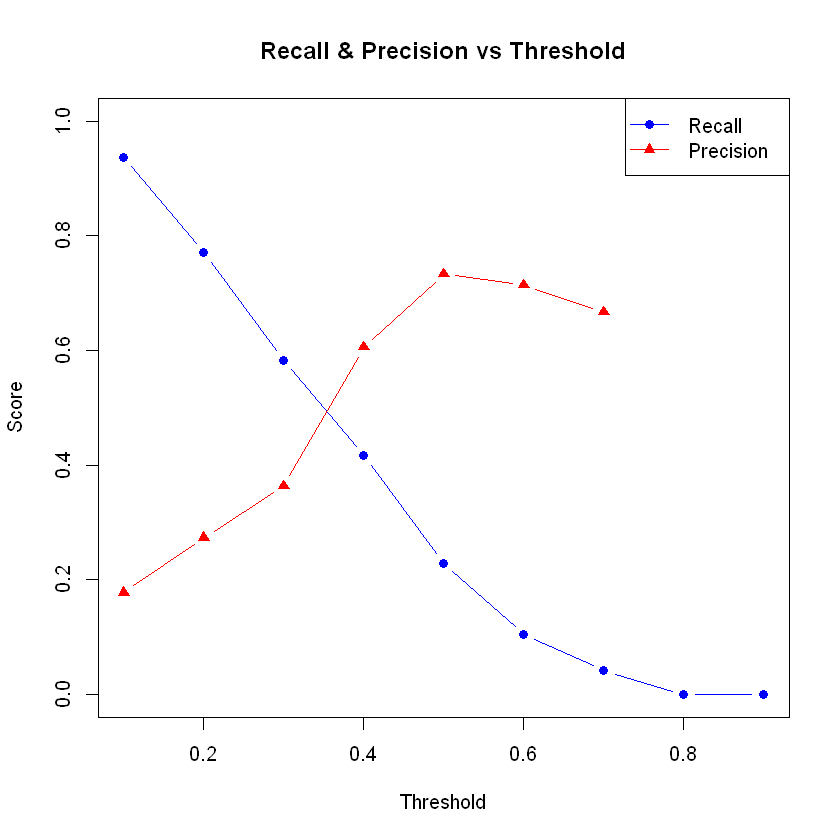

In [132]:
# Plot threshold vs recall and precision

## Recall
plot(thres_results$threshold,
     thres_results$recall,
     type = "b",
     main = "Recall & Precision vs Threshold",
     xlab = "Threshold",
     ylab = "Score",
     col = "blue",
     pch = 16,
     ylim = c(0, 1))

## Precision
lines(thres_results$threshold,
      thres_results$precision,
      type = "b",
      col = "red",
      pch = 17)

## Add a legend
legend("topright",
       legend = c("Recall", "Precision"),
       col = c("blue", "red"),
       pch = c(16, 17),
       lty = 1)

Comments:
- Although we are prioritising recall to identify potential leavers, a high recall means we will also incorrectly classify employees who are staying as leavers.
- A high number of false positives, while beneficial for retaining the company's talent, could lead to additional costs as resources are allocated to employees who are staying, instead of those who are leaving.
- As such, while we emphasize recall, this should not come at too great a cost to precision.
- Given this reasoning, I have chosen a threshold of 0.4, as it represents a good balance between recall and precision. Specifically, this threshold allows us to flag 33 employees out of 295, of which 20 are true positives.
- If we adjust the threshold to 0.3, we would flag about twice as many (77 employees), but less than half of them (28) would be true positives.
- With threshold of 0.4, the company would be able to identify a small yet concentrated number of employees who are likely to leave and will benefit from any invested intervention.

## 4.5 Evaluate the Final Model

In [133]:
# Select the threshold
selected_thres <- 0.4

In [134]:
# Make poredictions with threshold = 0.4
rf_final_pred <- if_else(rf_predictions_1$pred_yes > selected_thres,
                         "Yes",
                         "No")

# Store the results in a tibble
rf_final_results <- tibble(actual = hr_test$Attrition,
                           predicted = factor(rf_final_pred,
                                              levels = c("Yes", "No")))

# Create a confusion matrix
rf_final_conf_mat <- conf_mat(rf_final_results,
                              truth = actual,
                              estimate = predicted)

# Get metrics
summary(rf_final_conf_mat)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8610169
kap,binary,0.4164616
sens,binary,0.4166667
spec,binary,0.9473684
ppv,binary,0.6060606
npv,binary,0.8931298
mcc,binary,0.4262896
j_index,binary,0.3640351
bal_accuracy,binary,0.6820175


## 4.6 Get Variable Importance

### 4.6.1 Get Level of Importance

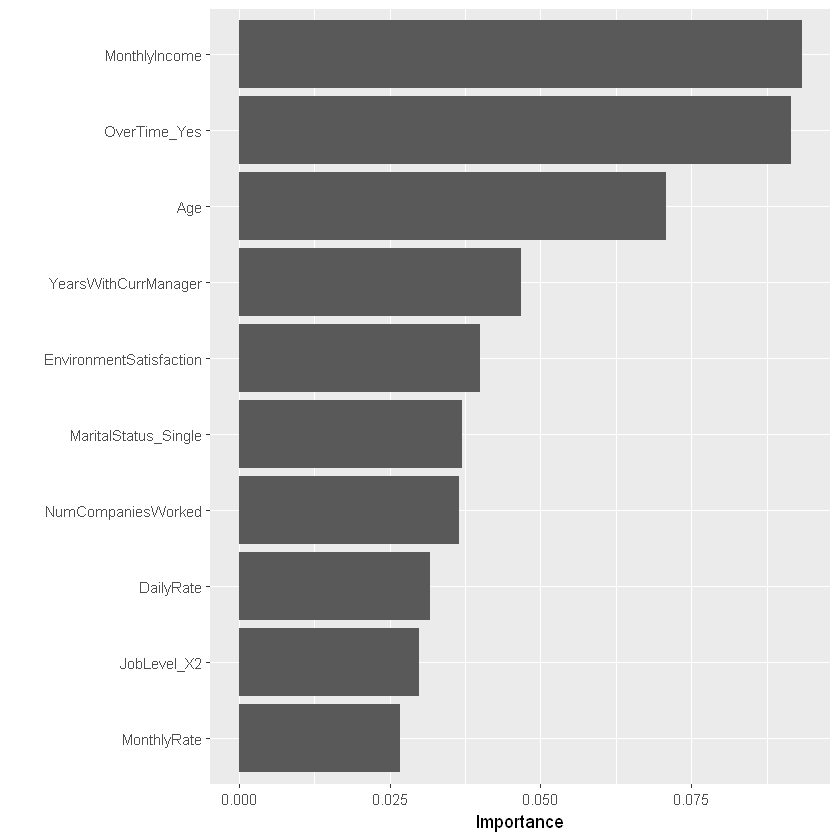

In [135]:
# Get final fit model
rf_final_model_1 <- extract_fit_parsnip(rf_wkl_fit_1)

# Get levels of importance
vip(rf_final_model_1)

### 4.6.2 View the Relationships of the Top Predictors

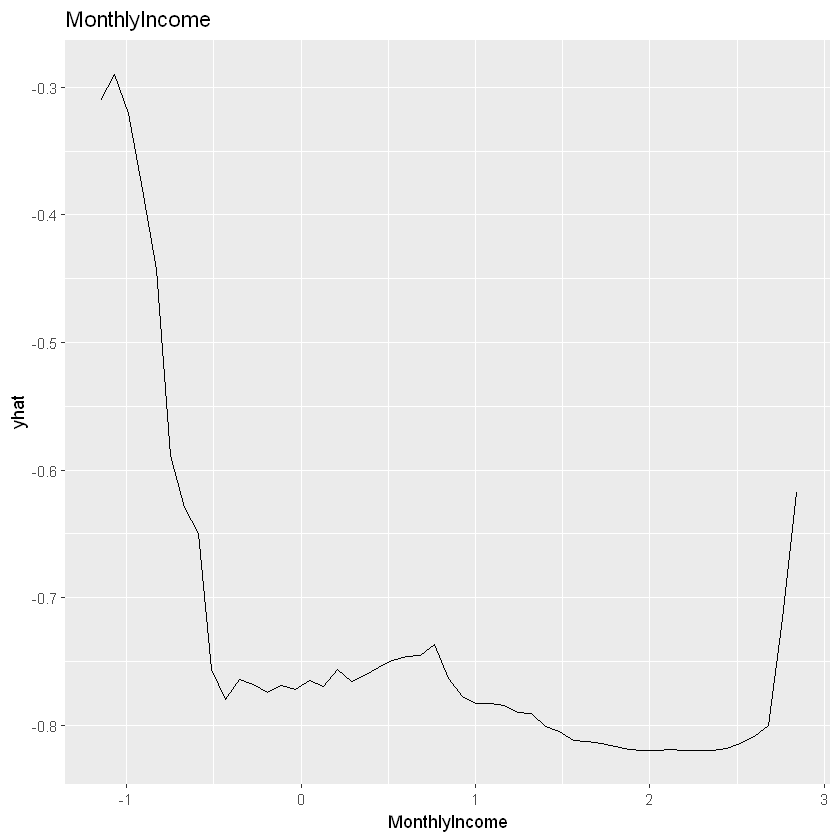

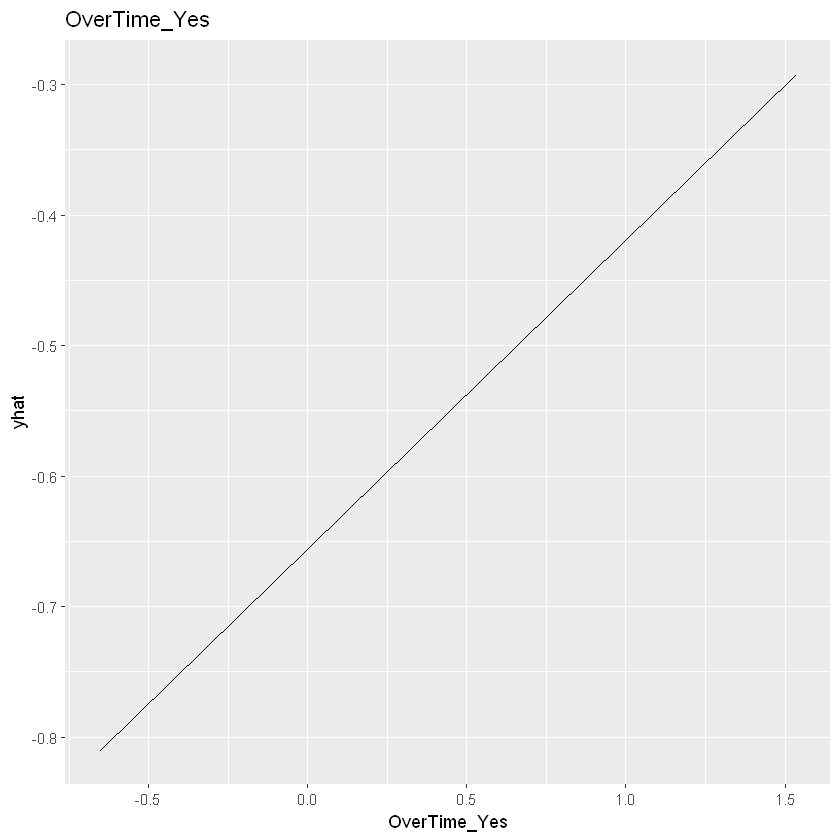

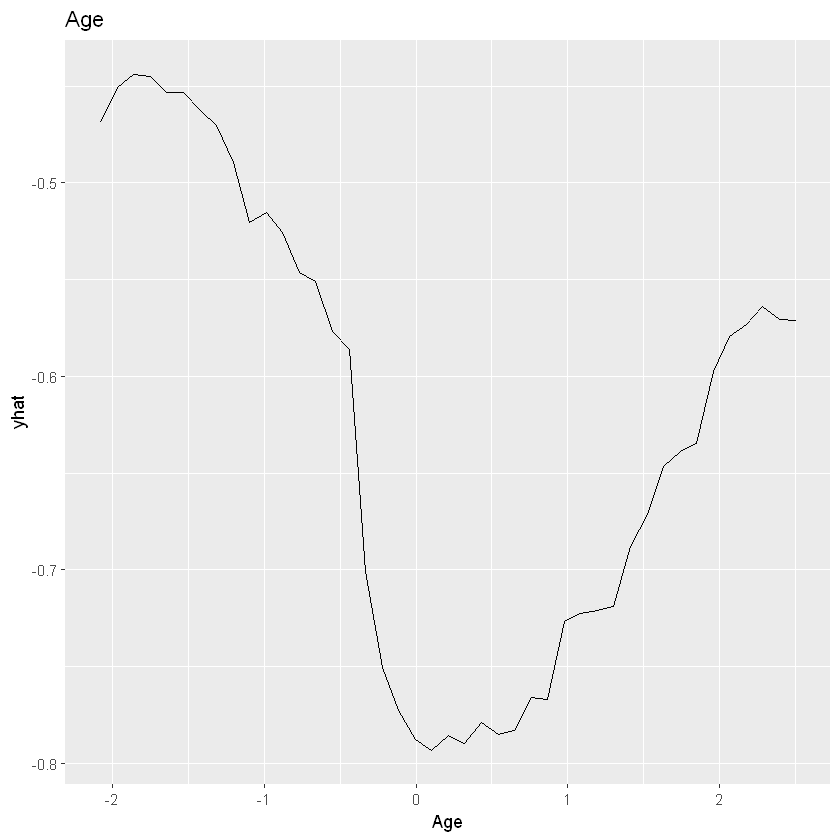

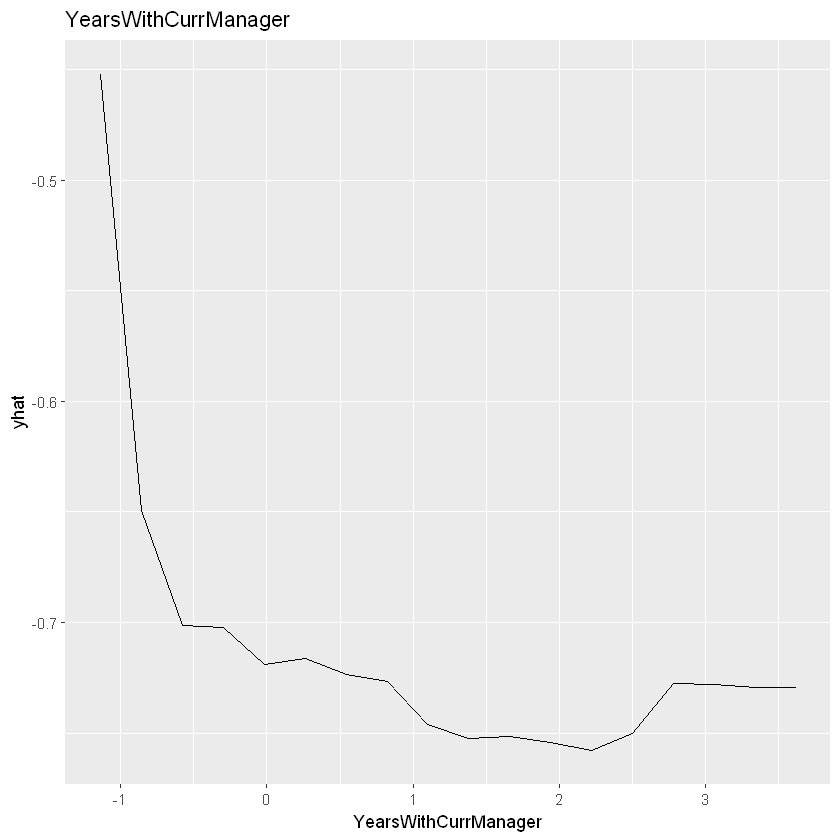

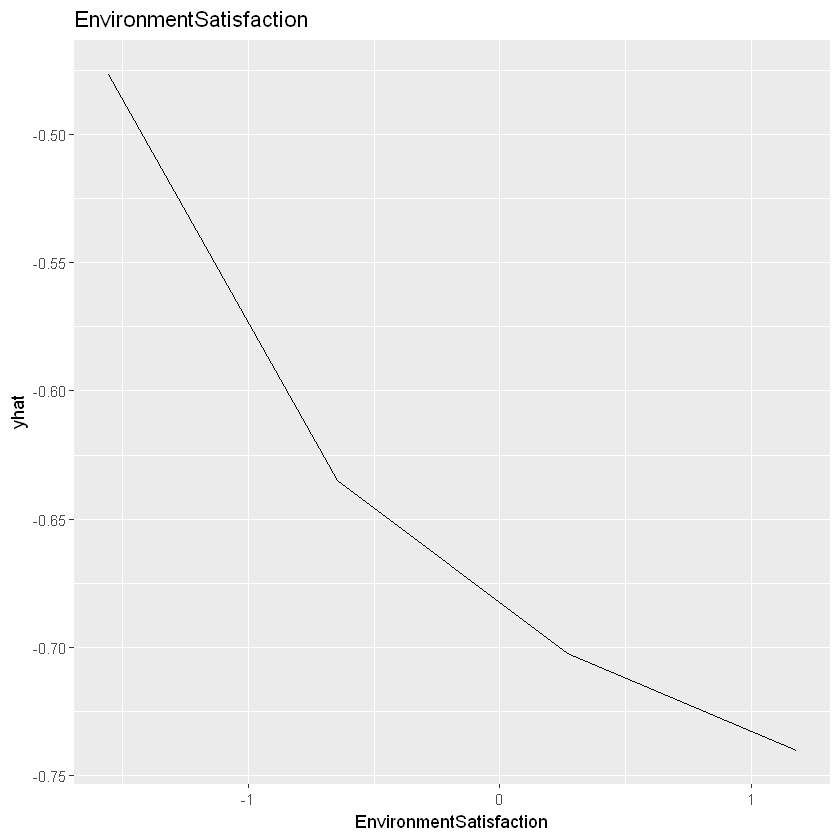

In [136]:
# Create a vector of 5 most important predictors
important_predictors <- c("MonthlyIncome",
                          "OverTime_Yes",
                          "Age",
                          "YearsWithCurrManager",
                          "EnvironmentSatisfaction")

# For-loop through the vector
for (predictor in important_predictors) {
  
  ## Plot the relationship between predictor and attrition
  pd <- partial(rf_final_model_1$fit,
                pred.var = predictor,
                train = juice(prep(rf_rec)))
  
  ## Print plot
  print(autoplot(pd) + ggtitle(predictor))
}


Comments:  
Based on the random forest model, the top five predictors of attrition are:
1. Monlthy income
2. Overtime
3. Age
4. Years with current manager
5. Environment satisfaction

**Predictor 1. Monthly income**  
Relationship with attrition: resembling U shape
- This predictor is also not surprising as employment is a transactional relationship.
- If employees feel the financial return is not sufficient for their effort, they may leave in search of a more satisfying contract.
- Additionally, at a certain point, being paid more may lead employees to seek new opportunities where they may be able to earn even more.

**Predictor 2. Overtime (yes)**  
Relationship with attrition: linear (positive)
- This is not surprising, given that overtime may be associated with workload or lead employees to perceive their work as more demanding.
- This, in turn, may lead to more work-related stress, which makes employees more likely to leave the company.

**Predictor 3. Age**  
Relationship with attrition: resembling U shape
- The relationship between this predictor and attrition suggests that younger people are more likely to leave.
- As they age, they become less likely to leave, up to a certain point.
- After that, they become more likely to leave, but not as likely as their younger counterparts.

**Predictor 4. Years with current manager**  
Relationship with attrition: resembling L shape
- There are two ways to interpret this.
- First, this predictor may not be the cause but a correlate of attrition, as people who leave early are likely to have fewer years with their managers.
- Second, years with current managers may reflect stagnation in the employees' career, which may, in turn, motivate employees to seek career growth elsewhere.

**Predictor 5. Environment satisfaction**  
Relationship with attrition: relatively linear (negative)
- This predictor is in line with the two-factor theory, which states that part of employees' motivation stems from the work environment.
- The direction of the relationship suggests that the less satisfied the employees are with their environment, the more likely they are to leave.

# 5. Summary & Recommendations

## 5.1 Project Recap

This project aimed to explore and predict employee attrition to aid a company in retaining their talents.

The project was successful in both regards.

## 5.2 Exploring Attrition

### 5.2.1 Overview

I first explored the relationships between numeric variables and attrition and found that these relationships are small, suggesting that attrition may not be easily attributable to any single factor.

### 5.2.2 The Three Likely Predictors


Next, I dived into the attrition patterns among three factors which are likely to contribute to attrition, namely monthly income, overtime, and environment satisfaction.

**Monthly income**  
I found that on average, people who left earned less than those who stayed, suggesting that monthly income may be a major predictor of attrition.

**Overtime**  
In the overtime group, there were a higher percentage of people leaving and a smaller percentage of people staying. This suggests that working overtime likely contributes to attrition.

**Environment satisfaction**  
There was a significant yet small difference between people who left and those who stayed in terms of environment satisfaction. This suggests that this factor may be a valid but has little relatively small influence on attrition. 


### 5.2.3 Department & Job Role

I also explored attrition in relation to job structures: department and job role.

**Department**  
I found that Sales had the highest percentage of people leaving and lowest percentage of people staying, suggesting that this department may be mostly heavily impacted by attrition.

Reversed is true for R&D, where the percentage of people staying was the highest, and the percentage of people leaving the lowest.

**Job role (and job level)**  
I found that Sales Rep had the highest percentage of attrition, and Research Director had the lowest percentage of attrition.

Furthermore, with an additional analysis that followed up on the observation that employees who left tended to cluster in the non-management positions, I found that lower job levels had higher percentage of attrition compared to higher job levels.

### 5.2.4 Gender & Age
Lastly, I explored attrition in relation to gender and age.

**Gender**  
For both gender, the percentage of attrition was similar, suggesting that gender may not be a contributor to attrition.

**Age**  
I found that in the younger employees, there were a higher number of people leaving than staying, suggesting that attrition may be predictable by age.

## 5.3 Predicting Attrition

I was able to build a predictive model using the random forest method.

The model demonstrated good accuracy (86%) and moderate precision (60%) and recall (41%).

The model also provided insights into the importance of each variable in the dataset. Specifically, it suggests that the top five predictors of attrition are:  
1. Monthly income  
2. Overtime (yes)  
3. Age  
4. Years with current manager  
5. Environment satisfaction  

## 5.4 Recommendations

Based on the top five predictors from the model, I make the following business recommendations.

**Predictor 1. Monthly income**  
- **Recommendation 1:** Consider the salary structure by balancing the incentive with the workload. This may be done in conjunction with recommendation 1 from predictor 1.

**Predictor 2. Overtime (yes)**  
- **Recommendation 1:** Manage the workload by reviewing the company's overall workload and reallocating certain responsibilities, as well as cutting down on non-essential tasks to relieve employees of unnecessary workload.
- **Recommendation 2:** Implement new technology or work procedures which may facilitate work processes, allowing employees to accomplish the same amount of work in less time. This is a win-win situation where the company enjoys the same level of productivity while the employees become happier.

**Predictor 3. Age**  
- **Recommendation 1:** The company may investigate whether the company culture is a good fit for younger hires, given that younger employees are more likely to leave the company. If the culture is a contributor, the company may implement a plan to adjust certain aspects of the company culture to be more attractive to younger hires.
- **Recommendation 2:** Regarding older employees, the company may also explore what factors are driving these employees away. This may be due to culture or other job or workplace characteristics, such as career path or promotion opportunities.

**Predictor 4. Years with current managers**  
- **Recommendation 1:** Validate whether years with current managers are predictive of attrition. This may be done by selectively interviewing employees or reviewing additional employee data.
- **Recommendation 2:** If years with current managers reflect stagnation, communicate a clear career path to employees to ensure that they are aware of the opportunities for professional growth.

**Predictor 5. Environmental satisfaction**  
- **Recommendation 1:** The company may dive deeper into which environmental factors may discourage employees from staying. These may be physical (e.g., workspace, common areas), social (e.g., peers, supervisors), or a combination of both. By analysing which contextual factors contribute to attrition, the company has a greater chance of successfully tackling attrition.